## Pre-processing

### Cleaning

In [262]:
pip install xgboost


     -------------------------------------- 89.1/89.1 MB 377.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
import collections
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier





In [ ]:
# importing the data
ccba = pd.read_csv('data/public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('data/public_train_x_cdtx0001_full_hashed.csv')
cust_info = pd.read_csv('data/public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('data/public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('data/public_train_x_remit1_full_hashed.csv')
public_date = pd.read_csv('data/public_x_alert_date.csv')
train_date = pd.read_csv('data/train_x_alert_date.csv')
sample = pd.read_csv('data/sampleSubmission.csv')
answer_y = pd.read_csv('data/train_y_answer.csv')

In [ ]:
# save to pickle
ccba.to_pickle("data/ccba.pkl") 
cdtx.to_pickle("data/cdtx.pkl")
cust_info.to_pickle('data/cust_info.pkl')
dp.to_pickle('data/dp.pkl')
remit.to_pickle('data/remit.pkl')
public_date.to_pickle('data/public_date.pkl')
train_date.to_pickle('data/train_date.pkl')
sample.to_pickle('data/sample.pkl')
answer_y.to_pickle('data/answer_y.pkl')

In [3]:
## load as pickle files
ccba = pd.read_pickle("data/ccba.pkl") 
cdtx = pd.read_pickle("data/cdtx.pkl")
cust_info = pd.read_pickle('data/cust_info.pkl')
dp = pd.read_pickle('data/dp.pkl')
remit = pd.read_pickle('data/remit.pkl')
public_date = pd.read_pickle('data/public_date.pkl')
train_date = pd.read_pickle('data/train_date.pkl')
sample = pd.read_pickle('data/sample.pkl')
answer_y = pd.read_pickle('data/answer_y.pkl')

In [4]:
train_date.head()

,alert_key,date
0,171189,0
1,171202,0
2,171599,0
3,171737,0
4,171142,0


In [5]:
# combining the two dates CSVs in one
dates = pd.concat([public_date,train_date], axis=0)
dates.head()

,alert_key,date
0,352342,365
1,352866,365
2,352696,365
3,352330,365
4,352683,365


In [ ]:
# merging data (the only ones that have alert_key)

In [6]:
merge1 = cust_info.merge(dates, on='alert_key', how='left')
merge1

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365
...,...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364


In [7]:
merge2 = merge1.merge(answer_y, on='alert_key', how='left')
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN
...,...,...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0


In [8]:
# merging more attributes cdtx
merge2 = merge2.merge(cdtx, on='cust_id', how='left')

In [9]:
merge2 = merge2.drop_duplicates(subset=['alert_key','cust_id'])

In [130]:
merge2 = merge2.drop(['date_x','date_y'],axis=1)

In [10]:
merge2=merge2.drop_duplicates(subset=['alert_key','cust_id'])
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,cur_type,amt
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,NaN,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,47.0,1110.0
9,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN,NaN,NaN,NaN,NaN
10,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN,25.0,130.0,47.0,144559.0
34,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13060691,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,47.0,2601.0
13062781,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,47.0,122.0
13063910,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,NaN,NaN,NaN,NaN
13063911,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,NaN,NaN,NaN,NaN


In [11]:
# merging more attributes ccba
merge2 = merge2.merge(ccba, on='cust_id', how='left')

In [12]:
merge2.columns

Index(['alert_key', 'cust_id', 'risk_rank', 'occupation_code', 'total_asset',
       'AGE', 'date_x', 'sar_flag', 'date_y', 'country', 'cur_type', 'amt',
       'lupay', 'byymm', 'cycam', 'usgam', 'clamt', 'csamt', 'inamt', 'cucsm',
       'cucah'],
      dtype='object')

In [133]:
merge2 = merge2.drop(['AGE'],axis=1) #dont drop

In [13]:
merge2 = merge2.drop_duplicates(subset=['alert_key','cust_id'])
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,amt,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,1110.0,2197.0,0.0,174655.0,-2156.0,0.0,0.0,0.0,-2178.0,0.0
14,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN,25.0,130.0,...,144559.0,4447.0,0.0,206512.0,210149.0,144559.0,-144559.0,0.0,2548.0,144559.0
28,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237305,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,...,2601.0,106235.0,0.0,50806.0,34073.0,0.0,0.0,4862.0,111651.0,0.0
237318,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,...,122.0,39067.0,0.0,124192.0,43634.0,0.0,0.0,13224.0,35982.0,0.0
237331,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237332,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# merging more attributes dp 
merge2 = merge2.merge(dp, on='cust_id', how='left')
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,98.0,10.0,2.0,5241.0,28.0350,20.0,NaN,NaN,0.0,1.0
1,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,92.0,9.0,2.0,10481.0,27.9250,20.0,NaN,NaN,0.0,1.0
2,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,110.0,2.0,2.0,4557.0,4.3245,16.0,NaN,NaN,0.0,0.0
3,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,111.0,22.0,2.0,6289.0,28.0550,20.0,NaN,NaN,0.0,1.0
4,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,77.0,18.0,2.0,10481.0,27.7750,20.0,NaN,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30653563,352132,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3,364,0.0,1.0,130.0,...,351.0,20.0,2.0,40973.0,4.4410,20.0,NaN,NaN,0.0,1.0
30653564,352132,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3,364,0.0,1.0,130.0,...,349.0,15.0,2.0,1002.0,28.6160,20.0,NaN,NaN,0.0,1.0
30653565,352132,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3,364,0.0,1.0,130.0,...,334.0,13.0,2.0,139309.0,1.0000,13.0,4.0,141.0,1.0,1.0
30653566,352132,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3,364,0.0,1.0,130.0,...,357.0,17.0,2.0,286812.0,1.0000,13.0,4.0,0.0,0.0,1.0


In [15]:
merge2 = merge2.drop_duplicates(subset=['alert_key','cust_id'])
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,98.0,10.0,2.0,5241.0,28.035,20.0,NaN,NaN,0.0,1.0
4009,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,252.0,11.0,2.0,8314.0,27.730,20.0,NaN,NaN,0.0,1.0
4399,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN,NaN,NaN,...,244.0,2.0,2.0,52392.0,1.000,16.0,NaN,NaN,0.0,0.0
4454,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN,25.0,130.0,...,301.0,15.0,2.0,16.0,27.850,20.0,NaN,NaN,0.0,1.0
5434,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN,NaN,NaN,...,81.0,0.0,2.0,3926.0,1.000,16.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652373,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,...,380.0,0.0,2.0,203352.0,1.000,2.0,NaN,NaN,0.0,1.0
30652619,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,...,75.0,1.0,2.0,109016.0,1.000,16.0,NaN,NaN,0.0,0.0
30652757,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,NaN,NaN,...,364.0,9.0,2.0,6900402.0,1.000,6.0,NaN,NaN,0.0,0.0
30652777,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,NaN,NaN,...,12.0,11.0,2.0,11365.0,1.000,13.0,4.0,147.0,1.0,1.0


In [16]:
# merging more attributes remit
merge2 = merge2.merge(remit, on='cust_id', how='left')
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_date,trans_no,trade_amount_usd
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,5241.0,28.035,20.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,8314.0,27.730,20.0,NaN,NaN,0.0,1.0,252.0,0.0,19565.0
2,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,8314.0,27.730,20.0,NaN,NaN,0.0,1.0,253.0,0.0,29629.0
3,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,8314.0,27.730,20.0,NaN,NaN,0.0,1.0,256.0,0.0,33309.0
4,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,8314.0,27.730,20.0,NaN,NaN,0.0,1.0,257.0,0.0,33593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,...,203352.0,1.000,2.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,...,109016.0,1.000,16.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,NaN,NaN,...,6900402.0,1.000,6.0,NaN,NaN,0.0,0.0,76.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,NaN,NaN,...,11365.0,1.000,13.0,4.0,147.0,1.0,1.0,NaN,NaN,NaN


In [17]:
merge2 = merge2.drop_duplicates(subset=['alert_key','cust_id'])
merge2

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_date,trans_no,trade_amount_usd
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,NaN,NaN,...,5241.0,28.035,20.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,8314.0,27.730,20.0,NaN,NaN,0.0,1.0,252.0,0.0,19565.0
64,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN,NaN,NaN,...,52392.0,1.000,16.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
65,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN,25.0,130.0,...,16.0,27.850,20.0,NaN,NaN,0.0,1.0,385.0,0.0,68614.0
68,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN,NaN,NaN,...,3926.0,1.000,16.0,NaN,NaN,0.0,0.0,176.0,3.0,8356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,...,203352.0,1.000,2.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,...,109016.0,1.000,16.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,NaN,NaN,...,6900402.0,1.000,6.0,NaN,NaN,0.0,0.0,76.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,NaN,NaN,...,11365.0,1.000,13.0,4.0,147.0,1.0,1.0,NaN,NaN,NaN


In [19]:
merge2.columns

Index(['alert_key', 'cust_id', 'risk_rank', 'occupation_code', 'total_asset',
       'AGE', 'date_x', 'sar_flag', 'date_y', 'country', 'cur_type', 'amt',
       'lupay', 'byymm', 'cycam', 'usgam', 'clamt', 'csamt', 'inamt', 'cucsm',
       'cucah', 'debit_credit', 'tx_date', 'tx_time', 'tx_type', 'tx_amt',
       'exchg_rate', 'info_asset_code', 'fiscTxId', 'txbranch', 'cross_bank',
       'ATM', 'trans_date', 'trans_no', 'trade_amount_usd'],
      dtype='object')

In [20]:
# this only for the time series maybe, later for the other models
# saving the raw data and preprocessing the NaN of the Raw Data
#merge2.to_csv('data/all_raw')

merge2['risk_rank'] = merge2['risk_rank'].fillna(merge2['risk_rank'].median())
merge2['occupation_code'] = merge2['occupation_code'].fillna(merge2['occupation_code'].median())
merge2['total_asset'] = merge2['total_asset'].fillna(merge2['total_asset'].median())
merge2['AGE'] = merge2['AGE'].fillna(merge2['AGE'].median())
merge2['date_x'] = merge2['date_x'].fillna(merge2['date_x'].median())
merge2['date_y'] = merge2['date_y'].fillna(merge2['date_y'].median())
merge2['country'] = merge2['country'].fillna(merge2['country'].median())
merge2['cur_type'] = merge2['cur_type'].fillna(merge2['cur_type'].median())
merge2['amt'] = merge2['amt'].fillna(merge2['amt'].median())
merge2['lupay'] = merge2['lupay'].fillna(merge2['lupay'].median())
merge2['byymm'] = merge2['byymm'].fillna(merge2['byymm'].median())
merge2['cycam'] = merge2['cycam'].fillna(merge2['cycam'].median())
merge2['usgam'] = merge2['usgam'].fillna(merge2['usgam'].median())
merge2['clamt'] = merge2['clamt'].fillna(merge2['clamt'].median())
merge2['csamt'] = merge2['csamt'].fillna(merge2['csamt'].median())
merge2['inamt'] = merge2['inamt'].fillna(merge2['inamt'].median())
merge2['cucsm'] = merge2['cucsm'].fillna(merge2['cucsm'].median())
merge2['cucah'] = merge2['cucah'].fillna(merge2['cucah'].median())
merge2['tx_date'] = merge2['tx_date'].fillna(merge2['tx_date'].median())
merge2['tx_time'] = merge2['tx_time'].fillna(merge2['tx_time'].median())
merge2['tx_type'] = merge2['tx_type'].fillna(merge2['tx_type'].median())
merge2['tx_amt'] = merge2['tx_amt'].fillna(merge2['tx_amt'].median())
merge2['exchg_rate'] = merge2['exchg_rate'].fillna(merge2['exchg_rate'].median())
merge2['info_asset_code'] = merge2['info_asset_code'].fillna(merge2['info_asset_code'].median())
merge2['fiscTxId'] = merge2['fiscTxId'].fillna(merge2['fiscTxId'].median())
merge2['txbranch'] = merge2['txbranch'].fillna(merge2['txbranch'].median())
merge2['cross_bank'] = merge2['cross_bank'].fillna(merge2['cross_bank'].median())
merge2['trans_date'] = merge2['trans_date'].fillna(merge2['trans_date'].median())
merge2['ATM'] = merge2['ATM'].fillna(merge2['ATM'].median())
merge2['trans_no'] = merge2['trans_no'].fillna(merge2['trans_no'].median())
merge2['trade_amount_usd'] = merge2['trade_amount_usd'].fillna(merge2['trade_amount_usd'].median())
merge2


C:\Users\Ellis\AppData\Local\Temp\ipykernel_3820\802116536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge2['risk_rank'] = merge2['risk_rank'].fillna(merge2['risk_rank'].median())
C:\Users\Ellis\AppData\Local\Temp\ipykernel_3820\802116536.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge2['occupation_code'] = merge2['occupation_code'].fillna(merge2['occupation_code'].median())
C:\Users\Ellis\AppData\Local\Temp\ipykernel_3820\802116536.py:7: SettingWithCopyWarning: 
A value is trying to be 

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_date,trans_no,trade_amount_usd
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,3.0,130.0,...,5241.0,28.035,20.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,8314.0,27.730,20.0,4.0,137.0,0.0,1.0,252.0,0.0,19565.0
64,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN,3.0,130.0,...,52392.0,1.000,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
65,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN,25.0,130.0,...,16.0,27.850,20.0,4.0,137.0,0.0,1.0,385.0,0.0,68614.0
68,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN,3.0,130.0,...,3926.0,1.000,16.0,4.0,137.0,0.0,0.0,176.0,3.0,8356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,...,203352.0,1.000,2.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,...,109016.0,1.000,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,3.0,130.0,...,6900402.0,1.000,6.0,4.0,137.0,0.0,0.0,76.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,3.0,130.0,...,11365.0,1.000,13.0,4.0,147.0,1.0,1.0,82.0,0.0,18359.0


In [21]:
# getting the test and training data for time series
# test data time series
test_datats = merge2[merge2['sar_flag']!=0]
test_datats = test_datats[test_datats['sar_flag']!=1]
test_datats = test_datats.drop_duplicates(subset='alert_key')
test_datats = test_datats.drop(['debit_credit'],axis=1) #is string i think
test_datats

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_date,trans_no,trade_amount_usd
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN,3.0,130.0,...,5241.0,28.035,20.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN,16.0,130.0,...,8314.0,27.730,20.0,4.0,137.0,0.0,1.0,252.0,0.0,19565.0
64,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN,3.0,130.0,...,52392.0,1.000,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
65,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN,25.0,130.0,...,16.0,27.850,20.0,4.0,137.0,0.0,1.0,385.0,0.0,68614.0
68,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN,3.0,130.0,...,3926.0,1.000,16.0,4.0,137.0,0.0,0.0,176.0,3.0,8356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29842,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,3,393,NaN,90.0,130.0,...,198.0,1.000,12.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
29843,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,3,393,NaN,5.0,130.0,...,20098.0,39.080,20.0,4.0,137.0,0.0,1.0,6.0,0.0,17280.0
29918,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,2,393,NaN,114.0,130.0,...,141.0,27.820,20.0,4.0,137.0,0.0,1.0,7.0,0.0,30001.0
30082,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,2,393,NaN,264.0,134.0,...,3025.0,4.341,20.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0


In [22]:
# training data time series
train_datats=merge2.dropna(subset=['sar_flag'])
train_datats=train_datats.drop_duplicates(subset='alert_key')
train_datats

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date_x,sar_flag,date_y,country,...,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_date,trans_no,trade_amount_usd
30084,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0.0,25.0,130.0,...,122.0,1.0,1.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
30085,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0,0.0,10.0,130.0,...,43628.0,1.0,12.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
30086,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0,0.0,3.0,130.0,...,1651.0,1.0,13.0,21.0,29.0,0.0,1.0,82.0,0.0,18359.0
30087,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0,0.0,55.0,130.0,...,287.0,1.0,4.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
30088,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0,0.0,2.0,130.0,...,468022.0,1.0,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0,2.0,130.0,...,203352.0,1.0,2.0,4.0,137.0,0.0,1.0,82.0,0.0,18359.0
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0,0.0,130.0,...,109016.0,1.0,16.0,4.0,137.0,0.0,0.0,82.0,0.0,18359.0
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0,3.0,130.0,...,6900402.0,1.0,6.0,4.0,137.0,0.0,0.0,76.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0,3.0,130.0,...,11365.0,1.0,13.0,4.0,147.0,1.0,1.0,82.0,0.0,18359.0


In [23]:
# saving to pickle train/test time series
#merge2.to_csv('data/allrawts')
#train_datats.to_pickle('data/train_datats.pkl')
#test_datats.to_pickle('data/test_datats.pkl')

In [341]:
# here starts the prepro for XGBoost
#for not time series test(maybe date is not important for the XGboost)
merge2 = merge2.drop(['tx_date','tx_time','trans_date','debit_credit'],axis=1) 

In [ ]:
# getting the test and training data

In [335]:
# test data
test_data = merge2[merge2['sar_flag']!=0]
test_data = test_data[test_data['sar_flag']!=1]

In [355]:
test_data = test_data.drop_duplicates(subset='alert_key')
test_data = test_data.drop(['debit_credit'],axis=1)
test_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,NaN,130.0,47.0,606.0,7025.0,...,2.0,5241.0,28.035,20.0,4.0,132.5,0.0,1.0,0.0,20647.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,NaN,130.0,47.0,1110.0,2197.0,...,2.0,8314.0,27.730,20.0,4.0,132.5,0.0,1.0,0.0,19565.0
64,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,NaN,130.0,47.0,606.0,7025.0,...,2.0,52392.0,1.000,16.0,4.0,132.5,0.0,0.0,0.0,20647.0
65,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,NaN,130.0,47.0,144559.0,4447.0,...,2.0,16.0,27.850,20.0,4.0,132.5,0.0,1.0,0.0,68614.0
68,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,NaN,130.0,47.0,606.0,7025.0,...,2.0,3926.0,1.000,16.0,4.0,132.5,0.0,0.0,3.0,8356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29842,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,NaN,130.0,47.0,30.0,8516.0,...,2.0,198.0,1.000,12.0,4.0,132.5,0.0,0.0,0.0,20647.0
29843,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,NaN,130.0,47.0,20176.0,48199.0,...,2.0,20098.0,39.080,20.0,4.0,132.5,0.0,1.0,0.0,17280.0
29918,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,NaN,130.0,47.0,390.0,0.0,...,2.0,141.0,27.820,20.0,4.0,132.5,0.0,1.0,0.0,30001.0
30082,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,NaN,134.0,46.0,26200.0,34978.0,...,2.0,3025.0,4.341,20.0,4.0,132.5,0.0,1.0,0.0,20647.0


In [ ]:
# training data
train_data=merge2.dropna(subset=['sar_flag'])
train_data=train_data.drop_duplicates(subset='alert_key')
train_data

In [374]:
test_data.columns

Index(['alert_key', 'cust_id', 'risk_rank', 'occupation_code', 'total_asset',
       'sar_flag', 'country', 'cur_type', 'amt', 'lupay', 'byymm', 'cycam',
       'usgam', 'clamt', 'csamt', 'inamt', 'cucsm', 'cucah', 'tx_type',
       'tx_amt', 'exchg_rate', 'info_asset_code', 'fiscTxId', 'txbranch',
       'cross_bank', 'ATM', 'trans_no', 'trade_amount_usd'],
      dtype='object')

In [376]:
# converting NaN to mean, meadian or mode in test data
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=You%20can%20use%20mean%20value,to%20replace%20the%20missing%20values.
# i think median because is less sensitive to outliers

test_data['risk_rank'] = test_data['risk_rank'].fillna(test_data['risk_rank'].median())
test_data['occupation_code'] = test_data['occupation_code'].fillna(test_data['occupation_code'].median())
test_data['total_asset'] = test_data['total_asset'].fillna(test_data['total_asset'].median())
test_data['country'] = test_data['country'].fillna(test_data['country'].median())
test_data['cur_type'] = test_data['cur_type'].fillna(test_data['cur_type'].median())
test_data['amt'] = test_data['amt'].fillna(test_data['amt'].median())
test_data['lupay'] = test_data['lupay'].fillna(test_data['lupay'].median())
test_data['byymm'] = test_data['byymm'].fillna(test_data['byymm'].median())
test_data['cycam'] = test_data['cycam'].fillna(test_data['cycam'].median())
test_data['usgam'] = test_data['usgam'].fillna(test_data['usgam'].median())
test_data['clamt'] = test_data['clamt'].fillna(test_data['clamt'].median())
test_data['csamt'] = test_data['csamt'].fillna(test_data['csamt'].median())
test_data['inamt'] = test_data['inamt'].fillna(test_data['inamt'].median())
test_data['cucsm'] = test_data['cucsm'].fillna(test_data['cucsm'].median())
test_data['cucah'] = test_data['cucah'].fillna(test_data['cucah'].median())
test_data['tx_type'] = test_data['tx_type'].fillna(test_data['tx_type'].median())
test_data['tx_amt'] = test_data['tx_amt'].fillna(test_data['tx_amt'].median())
test_data['exchg_rate'] = test_data['exchg_rate'].fillna(test_data['exchg_rate'].median())
test_data['info_asset_code'] = test_data['info_asset_code'].fillna(test_data['info_asset_code'].median())
test_data['fiscTxId'] = test_data['fiscTxId'].fillna(test_data['fiscTxId'].median())
test_data['txbranch'] = test_data['txbranch'].fillna(test_data['txbranch'].median())
test_data['cross_bank'] = test_data['cross_bank'].fillna(test_data['cross_bank'].median())
test_data['ATM'] = test_data['ATM'].fillna(test_data['ATM'].median())
test_data['trans_no'] = test_data['trans_no'].fillna(test_data['trans_no'].median())
test_data['trade_amount_usd'] = test_data['trade_amount_usd'].fillna(test_data['trade_amount_usd'].median())
test_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,NaN,130.0,47.0,606.0,7025.0,...,2.0,5241.0,28.035,20.0,4.0,132.5,0.0,1.0,0.0,20647.0
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,NaN,130.0,47.0,1110.0,2197.0,...,2.0,8314.0,27.730,20.0,4.0,132.5,0.0,1.0,0.0,19565.0
64,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,NaN,130.0,47.0,606.0,7025.0,...,2.0,52392.0,1.000,16.0,4.0,132.5,0.0,0.0,0.0,20647.0
65,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,NaN,130.0,47.0,144559.0,4447.0,...,2.0,16.0,27.850,20.0,4.0,132.5,0.0,1.0,0.0,68614.0
68,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,NaN,130.0,47.0,606.0,7025.0,...,2.0,3926.0,1.000,16.0,4.0,132.5,0.0,0.0,3.0,8356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29842,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,NaN,130.0,47.0,30.0,8516.0,...,2.0,198.0,1.000,12.0,4.0,132.5,0.0,0.0,0.0,20647.0
29843,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,NaN,130.0,47.0,20176.0,48199.0,...,2.0,20098.0,39.080,20.0,4.0,132.5,0.0,1.0,0.0,17280.0
29918,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,NaN,130.0,47.0,390.0,0.0,...,2.0,141.0,27.820,20.0,4.0,132.5,0.0,1.0,0.0,30001.0
30082,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,NaN,134.0,46.0,26200.0,34978.0,...,2.0,3025.0,4.341,20.0,4.0,132.5,0.0,1.0,0.0,20647.0


In [357]:
# training data
train_data=merge2.dropna(subset=['sar_flag'])
train_data=train_data.drop_duplicates(subset='alert_key')
train_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
30084,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,...,2.0,122.0,1.0,1.0,NaN,NaN,0.0,1.0,NaN,NaN
30085,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,...,2.0,43628.0,1.0,12.0,NaN,NaN,0.0,0.0,NaN,NaN
30086,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,0.0,NaN,NaN,NaN,NaN,...,1.0,1651.0,1.0,13.0,21.0,29.0,0.0,1.0,NaN,NaN
30087,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,...,2.0,287.0,1.0,4.0,NaN,NaN,0.0,1.0,NaN,NaN
30088,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,...,2.0,468022.0,1.0,16.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,47.0,2601.0,106235.0,...,2.0,203352.0,1.0,2.0,NaN,NaN,0.0,1.0,NaN,NaN
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,47.0,122.0,39067.0,...,2.0,109016.0,1.0,16.0,NaN,NaN,0.0,0.0,NaN,NaN
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,0.0,NaN,NaN,NaN,NaN,...,2.0,6900402.0,1.0,6.0,NaN,NaN,0.0,0.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,0.0,NaN,NaN,NaN,NaN,...,2.0,11365.0,1.0,13.0,4.0,147.0,1.0,1.0,NaN,NaN


In [375]:
# converting NaN to mean, meadian or mode in training data
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=You%20can%20use%20mean%20value,to%20replace%20the%20missing%20values.
# i think median because is less sensitive to outliers

train_data['risk_rank'] = train_data['risk_rank'].fillna(train_data['risk_rank'].median())
train_data['occupation_code'] = train_data['occupation_code'].fillna(train_data['occupation_code'].median())
train_data['total_asset'] = train_data['total_asset'].fillna(train_data['total_asset'].median())
train_data['country'] = train_data['country'].fillna(train_data['country'].median())
train_data['cur_type'] = train_data['cur_type'].fillna(train_data['cur_type'].median())
train_data['amt'] = train_data['amt'].fillna(train_data['amt'].median())
train_data['lupay'] = train_data['lupay'].fillna(train_data['lupay'].median())
train_data['byymm'] = train_data['byymm'].fillna(train_data['byymm'].median())
train_data['cycam'] = train_data['cycam'].fillna(train_data['cycam'].median())
train_data['usgam'] = train_data['usgam'].fillna(train_data['usgam'].median())
train_data['clamt'] = train_data['clamt'].fillna(train_data['clamt'].median())
train_data['csamt'] = train_data['csamt'].fillna(train_data['csamt'].median())
train_data['inamt'] = train_data['inamt'].fillna(train_data['inamt'].median())
train_data['cucsm'] = train_data['cucsm'].fillna(train_data['cucsm'].median())
train_data['cucah'] = train_data['cucah'].fillna(train_data['cucah'].median())
train_data['tx_type'] = train_data['tx_type'].fillna(train_data['tx_type'].median())
train_data['tx_amt'] = train_data['tx_amt'].fillna(train_data['tx_amt'].median())
train_data['exchg_rate'] = train_data['exchg_rate'].fillna(train_data['exchg_rate'].median())
train_data['info_asset_code'] = train_data['info_asset_code'].fillna(train_data['info_asset_code'].median())
train_data['fiscTxId'] = train_data['fiscTxId'].fillna(train_data['fiscTxId'].median())
train_data['txbranch'] = train_data['txbranch'].fillna(train_data['txbranch'].median())
train_data['cross_bank'] = train_data['cross_bank'].fillna(train_data['cross_bank'].median())
train_data['ATM'] = train_data['ATM'].fillna(train_data['ATM'].median())
train_data['trans_no'] = train_data['trans_no'].fillna(train_data['trans_no'].median())
train_data['trade_amount_usd'] = train_data['trade_amount_usd'].fillna(train_data['trade_amount_usd'].median())
train_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
30084,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,...,2.0,122.0,1.0,1.0,4.0,137.0,0.0,1.0,0.0,18076.0
30085,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,...,2.0,43628.0,1.0,12.0,4.0,137.0,0.0,0.0,0.0,18076.0
30086,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,0.0,130.0,47.0,606.0,12565.0,...,1.0,1651.0,1.0,13.0,21.0,29.0,0.0,1.0,0.0,18076.0
30087,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,...,2.0,287.0,1.0,4.0,4.0,137.0,0.0,1.0,0.0,18076.0
30088,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,...,2.0,468022.0,1.0,16.0,4.0,137.0,0.0,0.0,0.0,18076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,47.0,2601.0,106235.0,...,2.0,203352.0,1.0,2.0,4.0,137.0,0.0,1.0,0.0,18076.0
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,47.0,122.0,39067.0,...,2.0,109016.0,1.0,16.0,4.0,137.0,0.0,0.0,0.0,18076.0
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,0.0,130.0,47.0,606.0,12565.0,...,2.0,6900402.0,1.0,6.0,4.0,137.0,0.0,0.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,0.0,130.0,47.0,606.0,12565.0,...,2.0,11365.0,1.0,13.0,4.0,147.0,1.0,1.0,0.0,18076.0


In [377]:
# saving to pickle train/test
#merge2.to_pickle('data/all_merged.pkl')
#train_data.to_pickle('data/train_data_normalized_raw.pkl')
#test_data.to_pickle('data/test_data_normalized_raw.pkl')

In [369]:
# the data is really unbalanced 124/15189
train_data[train_data['sar_flag']==1.0]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
30396,171770,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,1.0,130.0,47.0,814.0,11650.0,...,2.0,229640.0,1.00,13.0,2.0,363.0,1.0,1.0,0.0,18076.0
30970,172480,7fde997da7e7a95280460889004bd2f23050bd8953de7e...,3,12.0,8251.0,1.0,130.0,47.0,307.0,30355.0,...,2.0,27814.0,1.00,13.0,4.0,169.0,1.0,1.0,0.0,18076.0
32413,174298,bf19e3fe441d8dfa31794de3b4c318770ca7da5b4f5973...,1,19.0,186714.0,1.0,130.0,47.0,3730.0,76645.0,...,2.0,1026.0,1.00,6.0,4.0,137.0,0.0,0.0,4.0,42223.0
35934,177788,6400e6bb0fea2dc8410931f6eaf99e9513e4c025f9c9c2...,1,15.0,1744729.0,1.0,130.0,47.0,104.0,13880.0,...,2.0,15365.0,1.00,4.0,4.0,137.0,0.0,1.0,0.0,18076.0
36204,177960,26eeff4dcdbf9ddb3e2628f8710a1e87b1ea53d37e0331...,1,9.0,238193.0,1.0,93.0,50.0,65.0,31162.0,...,2.0,446638.0,1.00,2.0,4.0,137.0,0.0,0.0,0.0,18076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392478,346021,9efb72c106f786e5a99a8c2b245864c831cf008dd2e9ee...,1,13.0,310.0,1.0,130.0,47.0,930.0,0.0,...,2.0,1404472.0,1.00,13.0,4.0,143.0,1.0,1.0,0.0,18076.0
394725,347051,a21eeb4acc2c9c128403c88c3f3e248bcf20067059d33b...,2,11.0,258763.0,1.0,130.0,47.0,606.0,12565.0,...,1.0,16.0,1.00,12.0,4.0,137.0,0.0,0.0,0.0,18076.0
395801,347894,9a1d940986fce29cd6b54d5a5fe076a5aa8026161f5627...,1,17.0,337845.0,1.0,130.0,47.0,606.0,12565.0,...,2.0,1292.0,28.52,20.0,4.0,137.0,0.0,1.0,0.0,3802.0
397144,348724,2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...,1,19.0,2439013.0,1.0,130.0,47.0,1133.0,6469.0,...,2.0,10449.0,1.00,13.0,4.0,137.0,0.0,0.0,0.0,18076.0


In [370]:
train_data[train_data['sar_flag']==0.0]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
30084,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,47.0,1990.0,12565.0,...,2.0,122.0,1.0,1.0,4.0,137.0,0.0,1.0,0.0,18076.0
30085,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,47.0,1349.0,3581.0,...,2.0,43628.0,1.0,12.0,4.0,137.0,0.0,0.0,0.0,18076.0
30086,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,0.0,130.0,47.0,606.0,12565.0,...,1.0,1651.0,1.0,13.0,21.0,29.0,0.0,1.0,0.0,18076.0
30087,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,47.0,51583.0,829364.0,...,2.0,287.0,1.0,4.0,4.0,137.0,0.0,1.0,0.0,18076.0
30088,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,47.0,410.0,636.0,...,2.0,468022.0,1.0,16.0,4.0,137.0,0.0,0.0,0.0,18076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,47.0,2601.0,106235.0,...,2.0,203352.0,1.0,2.0,4.0,137.0,0.0,1.0,0.0,18076.0
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,47.0,122.0,39067.0,...,2.0,109016.0,1.0,16.0,4.0,137.0,0.0,0.0,0.0,18076.0
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,0.0,130.0,47.0,606.0,12565.0,...,2.0,6900402.0,1.0,6.0,4.0,137.0,0.0,0.0,4.0,22127.0
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,0.0,130.0,47.0,606.0,12565.0,...,2.0,11365.0,1.0,13.0,4.0,147.0,1.0,1.0,0.0,18076.0


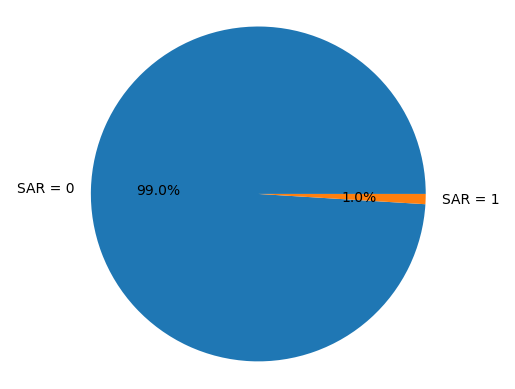

In [349]:
import matplotlib.pyplot as plt
# the amount of SAR = 1 and 0
fig,ax= plt.subplots(1,1)
ax.pie(merge2['sar_flag'].value_counts(), autopct='%1.1f%%',
      labels=['SAR = 0', 'SAR = 1'])
plt.axis('equal')
plt.ylabel('')
plt.show()

# finally everything is merge
try doing 4 test to see wich is the best method:
* 1) train with the raw data
* 2) train with oversamplig the 1s, undersampling the 0s
* 3) train with normalizing
* 4) train with normalizing and oversampling/undersampling

In [381]:
y_train = train_data['sar_flag'].values
X_train = train_data.drop(['alert_key','cust_id','sar_flag','country'],axis=1).values
X_test = test_data.drop(['alert_key','cust_id','sar_flag','country'],axis=1).values

In [379]:
# saving to pickle
#pd.DataFrame(y_train).to_pickle('data/y_train.pkl')
#pd.DataFrame(X_train).to_pickle('data/X_train.pkl')
#pd.DataFrame(X_test).to_pickle('data/X_test.pkl')

In [380]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(23906, 24)
(1845, 24)
(23906,)


### Normalizing

In [414]:
# Normalizing data with transactions in it, can me normilizng and also robustscaler
# training
from sklearn.preprocessing import StandardScaler
train_data['cur_type'] = StandardScaler().fit_transform(train_data['cur_type'].values.reshape(-1,1))
train_data['amt'] = StandardScaler().fit_transform(train_data['amt'].values.reshape(-1,1))
train_data['lupay'] = StandardScaler().fit_transform(train_data['lupay'].values.reshape(-1,1))
train_data['byymm'] = StandardScaler().fit_transform(train_data['byymm'].values.reshape(-1,1))
train_data['cycam'] = StandardScaler().fit_transform(train_data['cycam'].values.reshape(-1,1))
train_data['usgam'] = StandardScaler().fit_transform(train_data['usgam'].values.reshape(-1,1))
train_data['clamt'] = StandardScaler().fit_transform(train_data['clamt'].values.reshape(-1,1))
train_data['csamt'] = StandardScaler().fit_transform(train_data['csamt'].values.reshape(-1,1))
train_data['inamt'] = StandardScaler().fit_transform(train_data['inamt'].values.reshape(-1,1))
train_data['cucsm'] = StandardScaler().fit_transform(train_data['cucsm'].values.reshape(-1,1))
train_data['cucah'] = StandardScaler().fit_transform(train_data['cucah'].values.reshape(-1,1))
train_data['tx_type'] = StandardScaler().fit_transform(train_data['tx_type'].values.reshape(-1,1))
train_data['tx_amt'] = StandardScaler().fit_transform(train_data['tx_amt'].values.reshape(-1,1))
train_data['exchg_rate'] = StandardScaler().fit_transform(train_data['exchg_rate'].values.reshape(-1,1))
train_data['info_asset_code'] = StandardScaler().fit_transform(train_data['info_asset_code'].values.reshape(-1,1))
train_data['fiscTxId'] = StandardScaler().fit_transform(train_data['fiscTxId'].values.reshape(-1,1))
train_data['txbranch'] = StandardScaler().fit_transform(train_data['txbranch'].values.reshape(-1,1))
train_data['cross_bank'] = StandardScaler().fit_transform(train_data['cross_bank'].values.reshape(-1,1))
train_data['ATM'] = StandardScaler().fit_transform(train_data['ATM'].values.reshape(-1,1))
train_data['trans_no'] = StandardScaler().fit_transform(train_data['trans_no'].values.reshape(-1,1))
train_data['trade_amount_usd'] = StandardScaler().fit_transform(train_data['trade_amount_usd'].values.reshape(-1,1))
train_data


,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
30084,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,0.0,130.0,0.133718,-0.033644,-0.193290,...,0.253175,-0.146202,-0.494302,-2.242859,-0.213818,-0.011583,-0.305934,0.810575,-0.348436,-0.127171
30085,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,0.0,130.0,0.133718,-0.035758,-0.199826,...,0.253175,-0.079818,-0.494302,-0.296846,-0.213818,-0.011583,-0.305934,-1.233692,-0.348436,-0.127171
30086,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,0.0,130.0,0.133718,-0.038208,-0.193290,...,-2.937342,-0.143869,-0.494302,-0.119936,4.704181,-2.015188,-0.305934,0.810575,-0.348436,-0.127171
30087,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,0.0,130.0,0.133718,0.129892,0.400895,...,0.253175,-0.145951,-0.494302,-1.712128,-0.213818,-0.011583,-0.305934,0.810575,-0.348436,-0.127171
30088,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,0.0,130.0,0.133718,-0.038854,-0.201968,...,0.253175,0.567747,-0.494302,0.410795,-0.213818,-0.011583,-0.305934,-1.233692,-0.348436,-0.127171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403376,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,0.0,130.0,0.133718,-0.031629,-0.125150,...,0.253175,0.163898,-0.494302,-2.065948,-0.213818,-0.011583,-0.305934,0.810575,-0.348436,-0.127171
403377,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,0.0,130.0,0.133718,-0.039804,-0.174011,...,0.253175,0.019954,-0.494302,0.410795,-0.213818,-0.011583,-0.305934,-1.233692,-0.348436,-0.127171
403378,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,0.0,130.0,0.133718,-0.038208,-0.193290,...,0.253175,10.382647,-0.494302,-1.358307,-0.213818,-0.011583,-0.305934,-1.233692,3.093945,-0.049286
403379,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,0.0,130.0,0.133718,-0.038208,-0.193290,...,0.253175,-0.129047,-0.494302,-0.119936,-0.213818,0.173936,3.268679,0.810575,-0.348436,-0.127171


In [415]:
# normalizing test
test_data['cur_type'] = StandardScaler().fit_transform(test_data['cur_type'].values.reshape(-1,1))
test_data['amt'] = StandardScaler().fit_transform(test_data['amt'].values.reshape(-1,1))
test_data['lupay'] = StandardScaler().fit_transform(test_data['lupay'].values.reshape(-1,1))
test_data['byymm'] = StandardScaler().fit_transform(test_data['byymm'].values.reshape(-1,1))
test_data['cycam'] = StandardScaler().fit_transform(test_data['cycam'].values.reshape(-1,1))
test_data['usgam'] = StandardScaler().fit_transform(test_data['usgam'].values.reshape(-1,1))
test_data['clamt'] = StandardScaler().fit_transform(test_data['clamt'].values.reshape(-1,1))
test_data['csamt'] = StandardScaler().fit_transform(test_data['csamt'].values.reshape(-1,1))
test_data['inamt'] = StandardScaler().fit_transform(test_data['inamt'].values.reshape(-1,1))
test_data['cucsm'] = StandardScaler().fit_transform(test_data['cucsm'].values.reshape(-1,1))
test_data['cucah'] = StandardScaler().fit_transform(test_data['cucah'].values.reshape(-1,1))
test_data['tx_type'] = StandardScaler().fit_transform(test_data['tx_type'].values.reshape(-1,1))
test_data['tx_amt'] = StandardScaler().fit_transform(test_data['tx_amt'].values.reshape(-1,1))
test_data['exchg_rate'] = StandardScaler().fit_transform(test_data['exchg_rate'].values.reshape(-1,1))
test_data['info_asset_code'] = StandardScaler().fit_transform(test_data['info_asset_code'].values.reshape(-1,1))
test_data['fiscTxId'] = StandardScaler().fit_transform(test_data['fiscTxId'].values.reshape(-1,1))
test_data['txbranch'] = StandardScaler().fit_transform(test_data['txbranch'].values.reshape(-1,1))
test_data['cross_bank'] = StandardScaler().fit_transform(test_data['cross_bank'].values.reshape(-1,1))
test_data['ATM'] = StandardScaler().fit_transform(test_data['ATM'].values.reshape(-1,1))
test_data['trans_no'] = StandardScaler().fit_transform(test_data['trans_no'].values.reshape(-1,1))
test_data['trade_amount_usd'] = StandardScaler().fit_transform(test_data['trade_amount_usd'].values.reshape(-1,1))
test_data

,alert_key,cust_id,risk_rank,occupation_code,total_asset,sar_flag,country,cur_type,amt,lupay,...,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM,trans_no,trade_amount_usd
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,NaN,130.0,0.124948,-0.085139,-0.240582,...,0.278545,-0.225858,1.540831,1.058392,-0.191622,-0.019803,-0.289860,0.881735,-0.315224,-0.124347
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,NaN,130.0,0.124948,-0.077996,-0.256998,...,0.278545,-0.217078,1.516214,1.058392,-0.191622,-0.019803,-0.289860,0.881735,-0.315224,-0.139373
64,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,NaN,130.0,0.124948,-0.085139,-0.240582,...,0.278545,-0.091148,-0.641184,0.364888,-0.191622,-0.019803,-0.289860,-1.134128,-0.315224,-0.124347
65,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,NaN,130.0,0.124948,1.955197,-0.249348,...,0.278545,-0.240786,1.525899,1.058392,-0.191622,-0.019803,-0.289860,0.881735,-0.315224,0.541765
68,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,NaN,130.0,0.124948,-0.085139,-0.240582,...,0.278545,-0.229615,-0.641184,0.364888,-0.191622,-0.019803,-0.289860,-1.134128,2.489865,-0.295031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29842,365001,18ee644a371548e9780d701aaa7e0c8c42a7794cdee755...,1,17.0,135072.0,NaN,130.0,0.124948,-0.093303,-0.235512,...,0.278545,-0.240266,-0.641184,-0.328616,-0.191622,-0.019803,-0.289860,-1.134128,-0.315224,-0.124347
29843,365004,7f69fa9eab8f397d367e2bb61ee1fa008999a0aab91e06...,3,12.0,2285386.0,NaN,130.0,0.124948,0.192239,-0.100576,...,0.278545,-0.183412,2.432281,1.058392,-0.191622,-0.019803,-0.289860,0.881735,-0.315224,-0.171104
29918,365008,12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...,3,19.0,1230244.0,NaN,130.0,0.124948,-0.088201,-0.264469,...,0.278545,-0.240428,1.523478,1.058392,-0.191622,-0.019803,-0.289860,0.881735,-0.315224,0.005551
30082,365009,d24d46c19002ab1f9a02801af5e4be6a154b3c5adc0417...,1,17.0,162418.0,NaN,134.0,-0.102174,0.277621,-0.145532,...,0.278545,-0.232189,-0.371530,1.058392,-0.191622,-0.019803,-0.289860,0.881735,-0.315224,-0.124347


In [416]:
train_data.to_pickle('data/train_data_namean_norm.pkl')
test_data.to_pickle('data/test_data_namean_norm.pkl')

In [438]:
y_train = train_data['sar_flag'].values
X_train = train_data.drop(['alert_key','cust_id','sar_flag'],axis=1).values
X_test = test_data.drop(['alert_key','cust_id','sar_flag'],axis=1).values

### Oversampling

because of the problems created by the imbalanced data
we try oversampling and undersampling RandomOverSampler and SMOTE are two different ways to try it

In [ ]:
#https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

#!pip install imbalanced-learn

In [439]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42, sampling_strategy=0.3)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train.ravel())
# Check the number of records after over sampling
print(sorted(collections.Counter(y_train_ros).items()))

[(0.0, 23672), (1.0, 7101)]


In [185]:
# saving to pickle
pd.DataFrame(y_train_ros).to_pickle('data/y_train_ros.pkl')
pd.DataFrame(X_train_ros).to_pickle('data/X_train_ros.pkl')
pd.DataFrame(X_test).to_pickle('data/X_test_ros.pkl')

In [418]:
# it can be done also with smote
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
sm = SMOTEENN(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 234
Before OverSampling, counts of label '0': 23672 

After OverSampling, the shape of train_X: (33370, 25)
After OverSampling, the shape of train_y: (33370,) 

After OverSampling, counts of label '1': 15162
After OverSampling, counts of label '0': 18208


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Processing

In [382]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [383]:
y_pred=nb.predict(X_test)
y_pred_prob=nb.predict_proba(X_test)
train_pred=nb.predict(X_train)

In [ ]:
#pred=pd.DataFrame(y_pred)
#pred.to_csv('data/pred.csv')

In [ ]:
#alert_key = test_data['alert_key']
#alert_key.to_csv('data/alert_key.csv')

In [384]:
pred=pd.DataFrame(y_pred).value_counts()
pred

1.0    1750
0.0      95
dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
### Logistic Regression

In [387]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.01, penalty = 'l2', max_iter=2500)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=2500)

In [388]:
y_pred=lr.predict(X_test)
y_pred_prob=lr.predict_proba(X_test)
train_pred=lr.predict(X_train)

In [389]:
pred=pd.DataFrame(y_pred)
pred.value_counts()

0.0    1845
dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [391]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
# build DecisionTree model

DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)

# predicting
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

# pred result
y_test_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [392]:
pred=pd.DataFrame(y_test_pred)
pred.value_counts()

0.0    1781
1.0      64
dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [466]:
# Random Forest
from time import time
from sklearn.ensemble import RandomForestClassifier
t=time()

# building randomforest
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)

# training the model
rfc = rfc.fit(X_train_ros, y_train_ros)

# doing some predictions
y_train_pred = rfc.predict(X_train_ros)
y_test_pred = rfc.predict(X_test)

print (rfc.score(X_train_ros, y_train_ros))
print(y_test_pred[:10])
test_time = time() - t
print("test time:  %0.3fs" % test_time)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9934033080947584
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
test time:  9.306s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [467]:
pd.DataFrame(y_test_pred).value_counts()

0    1  
1.0  0.0    1845
dtype: int64

In [ ]:
pd.DataFrame(y_test_pred).to_csv('data/random_f.csv')

1) New data raw
0.0    1788
1.0      57
2) New data namean, norm , smoteeen
1.0    1173
0.0     672
3) New data namean, norm , random 0.3
0.0    1845

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [470]:
# XGBClassifier
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1)
xgb.fit(X_train_res, y_train_res)
xgb_pred = xgb.predict(X_test)

In [471]:
pd.DataFrame(xgb_pred).value_counts()

0    1  
0.0  1.0    1145
1.0  0.0     700
dtype: int64

1) New data raw
0    1693
1     152
2) New data namean, norm , smoteeen
1    1145
0     700
3) New data namean, norm , random 0.3
0.0    1845

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [120]:
from sklearn import svm

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_ros, y_train_ros)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)

In [ ]:
print (SVM.score(X_train, y_train))
print(predictions_SVM[:10])

In [ ]:
pd.DataFrame(predictions_SVM).value_counts()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [448]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_ros, y_train_ros)
knn_pred = knn.predict(X_test)

In [449]:
pd.DataFrame(knn_pred).value_counts()

0.0    1774
1.0      71
dtype: int64

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [450]:
#NN
# Importing libraries
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger

# importing some libraries
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [459]:
# deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train_res)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
#print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train_res = label_encode(label_encoder, y_train_res)
#y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
#print('y_test.shape: ', y_test.shape)

check label:  [0. 1.]

## Before convert
y_train[0:4]:
 [0. 0. 0. 0.]

y_train.shape:  (23906,)


## After convert
y_train[0:4]:
 [0. 0. 0. 0.]

y_train.shape:  (23906,)


In [460]:
# I/O check
input_shape = X_train_ros.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  25
output_shape:  2


In [461]:
# building the model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500 #training data
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 64 #hidden layers apply weights to the input
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=128)(H1)  # 64
H2 = ReLU()(H1_W2)          #we can change the functions, maybe gradient descent instead of RelU

# 3rd hidden layer
H2_W3 = Dense(units=128)(H2)  # 64
H3 = ReLU()(H2_W3)          #we can change the functions, maybe gradient descent instead of RelU

# 4rth hidden layer
H3_W4 = Dense(units=128)(H3)  # 64
H4 = ReLU()(H3_W4)          #we can change the functions, maybe gradient descent instead of RelU

# 5th hidden layer
H4_W5 = Dense(units=128)(H4)  # 64
H5 = ReLU()(H4_W5)          #we can change the functions, maybe gradient descent instead of RelU

# output layer
H5_W6 = Dense(units=output_shape)(H5)  # 4 #emotion prediction
H6 = Softmax()(H5_W6)

model_output = H6

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 25)]              0         
                                                                 
 dense_54 (Dense)            (None, 128)               3328      
                                                                 
 re_lu_45 (ReLU)             (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_46 (ReLU)             (None, 128)               0         
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                 
 re_lu_47 (ReLU)             (None, 128)               0   

In [462]:
# Trainig the model
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('data/training_log.csv') #will save our training results into .csv

# training setting
epochs = 15 #total number of iterations in one cicle
batch_size = 32 #number of samples we pass to the network in one pass



# training
history = model.fit(X_train_res, y_train_res, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger])
print('training finish')

Epoch 1/15
1043/1043 [==============================] - 3s 3ms/step - loss: 347.1165 - accuracy: 0.5497
Epoch 2/15
1043/1043 [==============================] - 3s 3ms/step - loss: 2.7594 - accuracy: 0.6060
Epoch 3/15
1043/1043 [==============================] - 3s 2ms/step - loss: 0.5893 - accuracy: 0.6318
Epoch 4/15
1043/1043 [==============================] - 3s 2ms/step - loss: 0.5784 - accuracy: 0.6395
Epoch 5/15
1043/1043 [==============================] - 3s 3ms/step - loss: 0.5703 - accuracy: 0.6437
Epoch 6/15
1043/1043 [==============================] - 3s 3ms/step - loss: 37.1621 - accuracy: 0.6387
Epoch 7/15
1043/1043 [==============================] - 3s 3ms/step - loss: 0.6545 - accuracy: 0.6209
Epoch 8/15
1043/1043 [==============================] - 3s 3ms/step - loss: 1.3657 - accuracy: 0.6253
Epoch 9/15
1043/1043 [==============================] - 3s 3ms/step - loss: 0.5771 - accuracy: 0.6238
Epoch 10/15
1043/1043 [==============================] - 3s 3ms/step - loss: 0.

In [484]:
# predict
pred_result2 = model.predict(X_test)
pred_result2[:50] #this nombers are in one hot

58/58 [==============================] - 0s 1ms/step


array([[5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.7590390e-01],
       [5.2409607e-01, 4.

In [485]:
# decode to words
pred_result2 = label_decode(label_encoder, pred_result2)
pred_result2[:50] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [486]:
# convert to DF
pred_result2_df=pd.DataFrame(pred_result2)
pred_result2_df.value_counts()

0.0    1822
1.0      23
dtype: int64

1) New data raw
0.0    1845
2) New data namean, norm , smoteeen acc 0.67
0.0    1822
1.0      23
3) New data namean, norm , random 0.3 acc 0.79
0.0    1837
1.0       8

In [ ]:
pred_result2_df.to_csv('data/nnpred.csv')

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [545]:
my_submission = pd.DataFrame({'alert_key':test_data['alert_key'], 'probability':pred_result2})
my_submission.head()


,alert_key,probability
0,352249,0.0
1,352253,0.0
64,352254,0.0
65,352280,0.0
68,352282,0.0


In [546]:
my_submission.to_csv('data/submission.csv', index=False)

In [547]:
sample_sub = pd.read_csv('data/sampleSubmission.csv')
submission = pd.read_csv('data/submission.csv')

In [548]:
submission = pd.merge(sample_sub,submission, on='alert_key', how='left')
submission.head()

,alert_key,probability_x,probability_y
0,357307,0.000017,0.0
1,376329,0.000324,NaN
2,373644,0.000372,NaN
3,357668,0.000489,0.0
4,354443,0.000526,0.0


In [549]:
submission = submission.drop(['probability_x'],axis=1)
submission.head()

,alert_key,probability_y
0,357307,0.0
1,376329,NaN
2,373644,NaN
3,357668,0.0
4,354443,0.0


In [550]:
submission.rename(columns = {'probability_y':'probability'}, inplace=True)

In [551]:
submission = submission.sort_values(by='probability',ascending=False)

In [552]:
submission.to_csv('data/submission.csv', index=False)